In [1]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import os

import wordcloud
import re
import sys
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
print (os.listdir(os.getcwd()))

['.git', '.gitattributes', '.ipynb_checkpoints', 'Data preparation.ipynb', 'Extracting tweets.ipynb', 'file-name', 'github', 'IMP .ipynb', 'test.csv', 'train.csv', 'twitterlogo.png', 'Untitled.ipynb', 'Untitled2.ipynb']


In [17]:
df = pd.read_csv('train.csv')
print("Training Set:"% df.columns, df.shape, len(train))


Training Set: (31962, 3) 31962


In [190]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [8]:
df.columns.values.tolist()  # return a list of column names

['id', 'label', 'tweet']

In [6]:
df.drop_duplicates(subset = None, inplace = True, keep= 'last')

In [10]:
df['tweet'].isnull().sum() # return the number of missing values in tweet

0

In [11]:
#knowing how many missing values in the data
count_nan=df.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0


In [103]:
#Data doesn't contain duplicate values neither does it contain missing values

In [12]:
#!/usr/bin/env python
import re

text = u"This dog's is a bird  \U0001f602"
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

This dog's is a bird  😂
This dog's is a bird  


In [13]:
 pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


In [14]:
import emoji

def extract_emojis(string):
  return ''.join(c for c in string if c in emoji.UNICODE_EMOJI['en'])

In [15]:

import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    print(emoji_list.sub(r'', text))

In [30]:
import re
import sys

# https://stackoverflow.com/a/49146722/330558
def extract_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

if __name__ == '__df__':
    text = open(sys.argv[1]).read()
    text = remove_emoji(string)
    print(string)


In [17]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [20]:
#Code to remove @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [21]:
#Removing numbers
df['clean_tweet'] = df['clean_tweet'].str.replace('\d+', '')


In [26]:
df['clean_tweet'] [7]

"the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams #hate #imagine #actorslife #revolutionschool #girl"

In [27]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[/] huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr !


In [28]:
df.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...,#holiday bull up: you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than weeks ð ðð¼ð¹ððµ #ibiz...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in ...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [12]:

pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [13]:
#Removing all the greek characters using unidecode library
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))


In [29]:
#To check the disappearance of greek symbols
df['clean_tweet'][7]

"the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams #hate #imagine #actorslife #revolutionschool #girl"

In [24]:
#Removing the word 'hmm' and it's variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [25]:
#Finding words with # attached to it
df['#'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [26]:
df.head()

,id,label,tweet,clean_tweet,#
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [27]:
frame = df['#']

In [28]:

frame.head()

0                              #run
1    #lyft #disapointed #getthanked
2                                  
3                            #model
4                       #motivation
Name: #, dtype: object

In [29]:
type(frame)

pandas.core.series.Series

In [30]:
frame = pd.DataFrame(frame)

In [31]:
frame = frame.rename({'#':'hash(#)'},axis = 'columns')

In [32]:
frame.head()

,hash(#)
0,#run
1,#lyft #disapointed #getthanked
2,
3,#model
4,#motivation


In [33]:
frame[frame['hash(#)'] == ''] = 'No hashtags'

In [34]:
df.head()

,id,label,tweet,clean_tweet,#
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [35]:
data_frame = pd.concat([df,frame],axis = 1)

In [76]:
data_frame.head(10)

,id,label,tweet,clean_tweet,#,hash(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation,#motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,#allshowandnogo,#allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|,,No hashtags
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...,#school #exams #hate #imagine #actorslife #rev...,#school #exams #hate #imagine #actorslife #rev...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,#allin #cavs #champions #cleveland #clevelandc...,#allin #cavs #champions #cleveland #clevelandc...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,#gr8,#gr8


In [77]:

data_frame.drop('#',axis = 1,inplace = True)
data_frame.head(10)

,id,label,tweet,clean_tweet,hash(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,#allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|,No hashtags
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...,#school #exams #hate #imagine #actorslife #rev...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,#allin #cavs #champions #cleveland #clevelandc...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,#gr8


In [ ]:
#Removing stopwords
import nltk
nltk.download('stopwords')
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [208]:
data_frame.head()

,id,label,tweet,clean_tweet,hash(#)
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use cau offer wheelch...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [144]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [145]:
data_frame.head()

,id,label,tweet,clean_tweet,hash(#)
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [153]:
len(corpus)

31962

In [49]:
#Stemming
ps = PorterStemmer()

data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [50]:
data_frame.head()

,id,label,tweet,clean_tweet,#,hash(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...,#run,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can't use cau they do...,#lyft #disapointed #getthanked,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesti,,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model,#model
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv,#motivation,#motivation


In [57]:
#nltk tokenization
from nltk.tokenize import word_tokenize 

df['tokenize_tweet'] = df.apply(lambda row: nltk.word_tokenize(row['clean_tweet']), axis=1)


In [58]:
df.head()


,id,label,tweet,clean_tweet,#,tokenize_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked,"[thanks, for, #, lyft, credit, i, ca, n't, use..."
2,3,0,bihday your majesty,bihday your majesty,,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model,"[#, model, i, love, u, take, with, u, all, the..."
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation,"[factsguide, :, society, now, #, motivation]"


In [164]:
#Tokenization
corpus = []
for i in range(0,31962):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [152]:
len(corpus)

31962

In [76]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
import re
import csv
import os

import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
from wordcloud import STOPWORDS
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
from PIL import Image
import numpy as np
twitter_mask= np.array(Image.open("twitterlogo.png"))
twitter_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

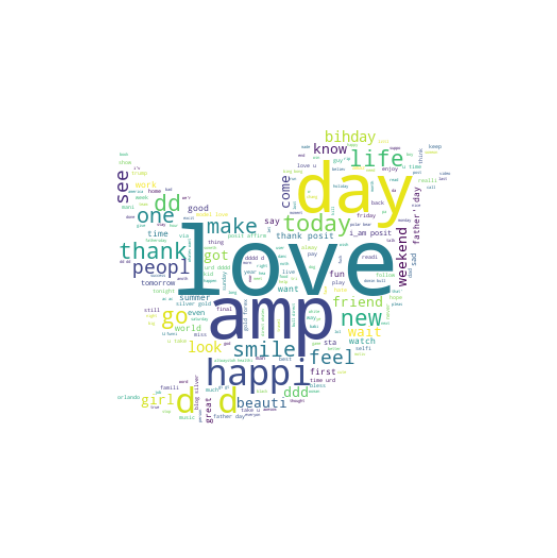

In [79]:
all_words = ' '.join([word for word in data_frame['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(mask = twitter_mask, background_color="white", width= twitter_mask.shape[2], height=600, random_state=21, max_font_size=110, stopwords= STOPWORDS).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear',cmap='viridis')
plt.axis('off')
plt.show()

Negative words


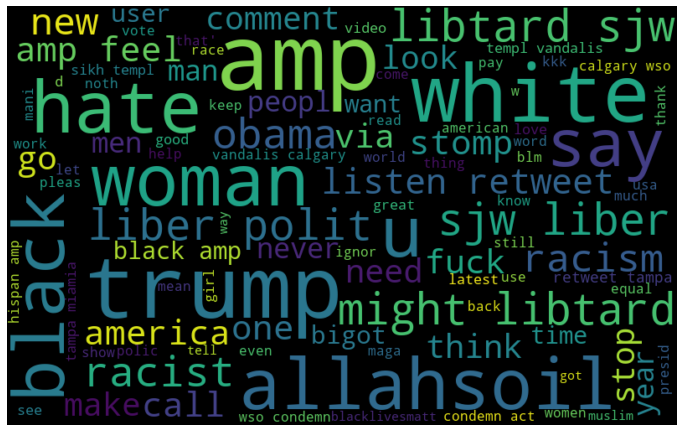

In [80]:

normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100, stopwords= STOPWORDS).generate(normal_words)
print('Negative words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [82]:
# function to print all the hashtags in a text
def hashtag_extract(text):
    hashtags = []
    # Loop over the words in the tweet
    for i in text:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [88]:

hash_positive = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 0])

# extracting hashtags from mean tweets
hash_negative = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

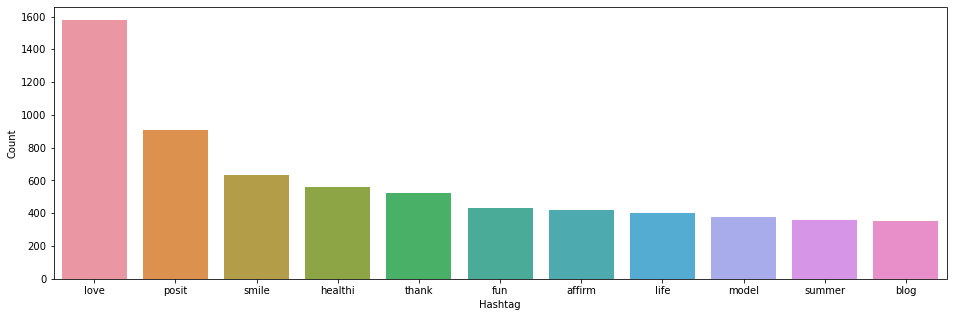

In [102]:
# Plotting most common hashtags 

a = nltk.FreqDist(hash_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 11)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x = "Hashtag", y="Count")
ax.set(ylabel = 'Count', xlabel = 'Hashtag')
plt.show()

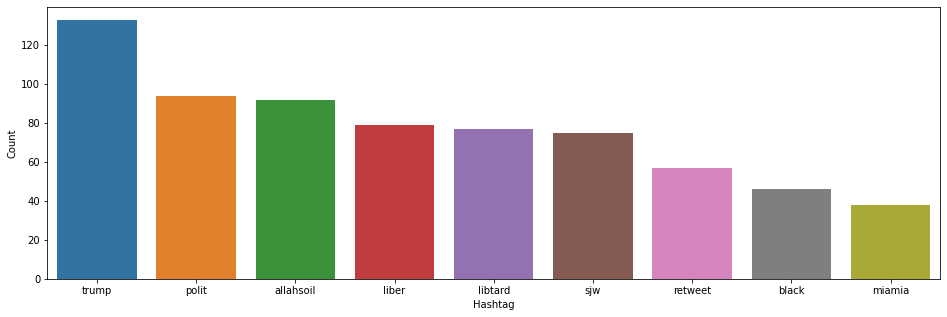

In [105]:

b = nltk.FreqDist(hash_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})

e = e.nlargest(columns="Count", n = 9)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x = "Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()


In [113]:

#Creating a dataframe to represent top 20 positive and negative hash words
l1 = pd.DataFrame(l_positive_values[0:20],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:20],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:20],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:20],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

NameError: name 'l_positive_values' is not defined

In [112]:

import plotly.express as px
#Animated plot for positive words with their frequency
fig = px.bar(z, x="Positive_Words", y="Positive_Count",animation_frame="Positive_Count",
            hover_name="Positive_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

NameError: name 'z' is not defined

In [110]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [115]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'label'].values

In [120]:
#Convert a collection of text documents to a matrix of token counts.
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1, 2))
vectors = []

for index, row in df.iterrows():
    vectors.append(", ".join(row[2]))

vectorised = vectorizer.fit_transform(corpus)

print(vectorised)


  (0, 62195)	1
  (0, 53834)	1
  (0, 156270)	1
  (0, 52350)	1
  (0, 97682)	1
  (0, 53836)	1
  (0, 151505)	1
  (0, 62238)	1
  (0, 53835)	1
  (0, 156273)	1
  (0, 52361)	1
  (0, 97736)	1
  (0, 53838)	1
  (1, 174635)	1
  (1, 110018)	1
  (1, 40797)	1
  (1, 30020)	1
  (1, 187202)	1
  (1, 31606)	1
  (1, 128185)	1
  (1, 194957)	1
  (1, 187891)	1
  (1, 134106)	1
  (1, 49893)	1
  (1, 73551)	1
  :	:
  (31959, 118564)	1
  (31959, 117793)	1
  (31959, 131360)	1
  (31959, 152178)	1
  (31959, 131363)	1
  (31959, 104993)	1
  (31959, 163730)	1
  (31959, 118725)	1
  (31959, 198190)	1
  (31960, 37927)	1
  (31960, 173984)	1
  (31960, 159813)	1
  (31960, 187912)	1
  (31960, 29421)	1
  (31960, 199592)	1
  (31960, 5227)	1
  (31960, 159815)	1
  (31960, 173988)	1
  (31960, 187913)	1
  (31960, 29423)	1
  (31960, 199593)	1
  (31960, 37928)	1
  (31961, 174635)	1
  (31961, 66783)	1
  (31961, 174800)	1
